## RNN Model for Amazon Sales Review Analysis..

## 1. Gather and Exploration of data.

In [2]:
# Importing the pandas library for viewing the data into a dataframe format..
import pandas as pd
raw_df = pd.read_csv('train.csv')

In [3]:
raw_df

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
3599994,1,Don't do it!!,The high chair looks great when it first comes...
3599995,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599996,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599997,1,what is it saying?,not sure what this book is supposed to be. It ...


In [4]:
# Here we are not using the second column.
raw_df = raw_df.drop(columns='Stuning even for the non-gamer')

- Here in our dataset, 1 = NEGATIVE and 2 = POSITIVE

In [5]:
# Let's check some of the information for the dataset.
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599999 entries, 0 to 3599998
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                      Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                      ----- 
 0   2                                                                  

In [6]:
#Let's first change the columns name for the ease of access.
raw_df['Target'] = raw_df['2']
raw_df['Reviews'] = raw_df['This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^']

In [7]:
# Dropping the unwanted columns..
raw_df = raw_df.drop(columns=['2'])
raw_df = raw_df.drop(columns=['This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'])

<Axes: xlabel='Target'>

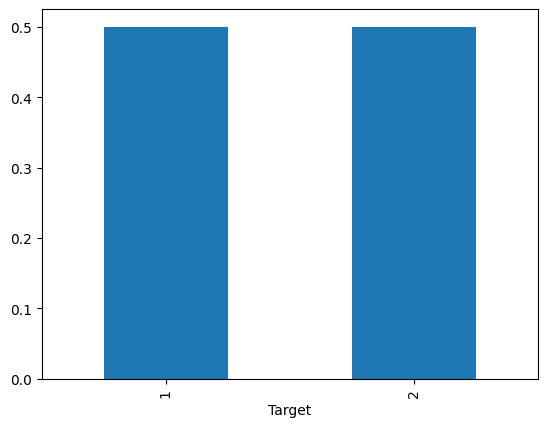

In [8]:
# Let's check the probablity distribution of the Negatives and Positives reviews.
raw_df['Target'].value_counts(normalize=True).plot(kind='bar')

## Now 3600000 is too much data, so we work with the sample of raw_df that is only 50% of the data..

In [9]:
# Taking sample of the data..
sample_df = raw_df.sample(frac = 0.5, random_state=29)

In [10]:
sample_df

,Target,Reviews
3374353,1,"Although this bag is pretty to look at, the fa..."
707757,2,The two disc DVD was great. I really enjoyed t...
1932880,1,I ordered two of these. The size is perfect fo...
1928314,2,Repairman Jack is awesome. The stories started...
1001855,1,I was test driving them as a possible fruit of...
...,...,...
156086,2,Vita Bath Moisturizing Bath Gelee smells like ...
1556740,1,I was actually looking forward to seeing this ...
852182,1,Its very catchy. I bought this one for my husb...
694080,1,The introduction is the best part of this book...


<Axes: xlabel='Target'>

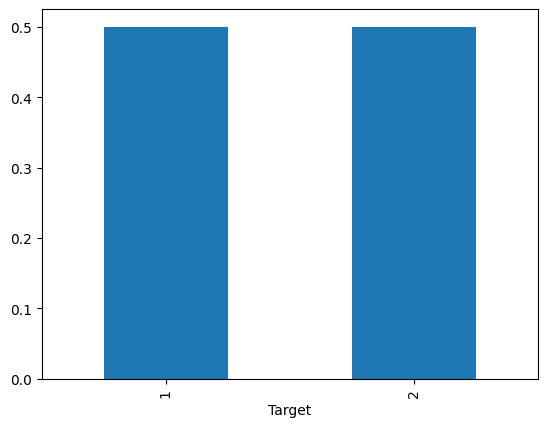

In [11]:
# Let's check the probablity distribution of the Negatives and Positives reviews on our sampele_df.
sample_df['Target'].value_counts(normalize=True).plot(kind='bar')

## 2. Preparing the data for training.
- (i) Vocabulary building using 'torch.Text'

In [12]:
# Importing the torchtext module for tokenization of the data..
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer('basic_english')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.

In [13]:
# Making some of the important parameters..
review_tokens = sample_df.Reviews.map(tokenizer)

In [14]:
unk_token = '<unk>' # For handling the unknown tokens..
pad_token = '<pad>' # For making the length same for the sentences..

In [15]:
# Now we can make our vocabulary from this..
VOCAB_SIZE = 5000
from torchtext.vocab import build_vocab_from_iterator
vocab = build_vocab_from_iterator(review_tokens,
                                   specials=[unk_token, pad_token],
                                   max_tokens=VOCAB_SIZE)


In [16]:
# Make a default token, if any word is not in the vocab..
vocab.set_default_index(vocab[unk_token])

- Creating the training and Validation Set..

<Axes: ylabel='Frequency'>

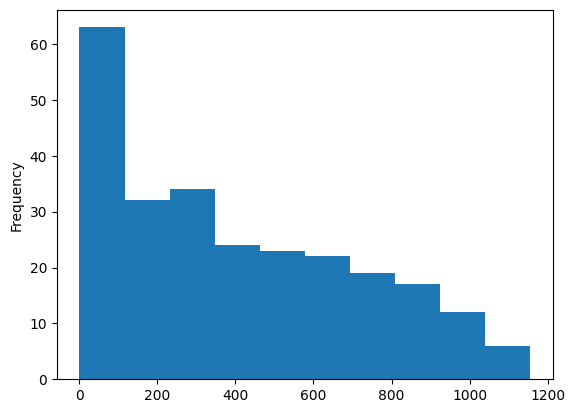

In [17]:
sample_df.Reviews.sample(100000).map(tokenizer).map(len).value_counts().plot(kind='hist')

In [18]:
# Defining the max length of the sentence.. Using some short analysis of the sample data..
MAX_LENGTH = 75

In [19]:
# Defining the helper function for padding of the sentences..
def pad_tokens(tokens):
    if len(tokens) >= MAX_LENGTH:
        return tokens[:MAX_LENGTH]
    else:
        return tokens + [pad_token] * ((MAX_LENGTH) - len(tokens))

In [20]:
import torch

In [21]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1800000 entries, 3374353 to 3277097
Data columns (total 2 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Target   int64 
 1   Reviews  object
dtypes: int64(1), object(1)
memory usage: 41.2+ MB


In [ ]:
# Creating the pytorch dataset..
from torch.utils.data import Dataset
class AmazonDataset(Dataset):

    # __init__ function.
    def __init__(self, df, is_test=False):
        self.df = df 
        self.is_test = is_test

    # __get_item__ function.
    def __getitem__(self, index):
        
        review_text = self.df.Reviews.values[index]               # Text Data.
        review_tokens = pad_tokens(tokenizer(review_text))        # Tokenization and padding.
        input = torch.tensor(vocab.lookup_indices(review_tokens)) # Converting to numbers.

        if self.is_test:
            target = torch.tensor(int(self.df['Target'].values[index])).float()
        else:
            target = torch.tensor(int(self.df['Target'].values[index])).float()  # A small pytorch bug, correct with 'int' type-casting!

        return input, target

    # Length function.
    def __len__ (self):
        return len(self.df)  

In [23]:
raw_ds = AmazonDataset(sample_df)

In [24]:
raw_ds[0]

(tensor([ 336,   12,  671,   13,  253,    8,  203,   41,    4,    3, 2326,   13,
           20, 1459,   15,    7, 2817,  671,    4,   29,    9,  263,   16,    9,
           46,    0,  458,    2,   99,    4,    3,  362, 4117,   13,   95,    0,
           20,  148,    8,    3,   39, 2705,   10,    3,    0,    9,  197,    8,
          164,  962,   14,    6,  209,   75,   50,    2,   99,    4,    9,   11,
           23,   95, 2829,    4, 1631,    4,  655,   50,  962,   43,    3,  659,
           13,   83,   95]),
 tensor(1.))

- Splitting the Data into training and validation Sets

In [25]:
# importing the random-split function for splitting..
from torch.utils.data import random_split
VAL_FRAC = 0.25 # Val set size i.e., 25 %

train_ds, val_ds = random_split(sample_df, [1-VAL_FRAC, VAL_FRAC])

len(train_ds) , len(val_ds)


(1350000, 450000)

-  Doing Same thing on test_df.

In [26]:
test_df = pd.read_csv('test.csv')
test_df

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
...,...,...,...
399994,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399995,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399996,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399997,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...


In [27]:
test_df = test_df.drop(columns='Great CD')

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Non-Null Count   Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                     

In [29]:
#Let's first change the columns name for the ease of access.
test_df['Target'] = test_df['2']
test_df['Reviews'] = test_df['My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"']

In [30]:
# Dropping the unwanted columns..
test_df = test_df.drop(columns=['2'])
test_df = test_df.drop(columns=['My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I\'m in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life\'s hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"'])

In [31]:
test_ds = AmazonDataset(test_df, is_test=True)

In [32]:
test_ds[0]

(tensor([1022,    3,  335,   16,    5,   25,   67,  523,    7,  267, 2497,   10,
            3,  160,    4,    3,  132,    5,  313,   40,  609,    3, 1292,    8,
            0, 4857,   93,   18,   49,   29,   79,   38, 1671,   53,    8,  290,
            3, 1074,    4,    6,    9, 2401,   31,   10,   27,  330,  561,    2,
           59,   13,   51, 1042,  927,   10,  254,    4, 2809,    4,    6, 1695,
          167,    2,  182,  720,    6,  416,  522,    5,  342,   37,    4,   29,
           59,   11,   23]),
 tensor(2.))

- Now we have to create PyTorch DataLoaders for making inputs the data into the Deep Learning Models using Batches.

In [33]:
# Importing the DataLoader module..
from torch.utils.data import DataLoader

# Defining the batch size..
BATCH_SIZE = 200

# Making the dataloaders for train, val and test dfs..
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE*2, num_workers=8, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE*2, num_workers=8, pin_memory=True)

## Building a RNN Model..

In [34]:
import torch.nn as nn
import torch.functional as F

In [ ]:
# Creating the embedding layer..
emb_layer = nn.Embedding(VOCAB_SIZE, 256, 1)

In [ ]:
# Creating the RNN Layer..
rnn_layer = nn.RNN(256, 128, 1, batch_first=True)

In [37]:
! pip install pytorch_lightning

  Using cached aiohappyeyeballs-2.4.6-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/819.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/819.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/819.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/819.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/819.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/819.3 kB ? eta -:--:--
   ------------ --------------------------- 262.1/819.3 kB ? eta -:--:--
   ------------ --------------------------- 262.1/819.3 kB ? eta -:--:--
   ------------ --------------------------- 262.1/819.3 kB ? eta -:--:--
   ------------------------ ------------- 524.3/819.3 kB 558.9 kB/s eta 0:00:01
   ------------------------ ------------- 524.3/819.3 kB 558.9 kB/s eta 0:00:01
   -------------------------------------- 819.3/819.